# Time Series Analysis

## Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series

% matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

UsageError: Line magic function `%` not found.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_original =  train.copy()
test_original =  test.copy()

## EDA

In [3]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [4]:
train.shape

(18288, 3)

In [5]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [6]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [7]:
test.shape

(5112, 2)

In [8]:
test.dtypes

ID           int64
Datetime    object
dtype: object

## Feature Engineering

In [9]:
train['Datetime'] = pd.to_datetime(train.Datetime,format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format = '%d-%m-%Y %H:%M')

In [10]:
test_original['Datetime'] = pd.to_datetime(train_original.Datetime , format= '%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(test_original.Datetime , format= '%d-%m-%Y %H:%M')

In [12]:
for i in(train,test_original,test,train_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [13]:
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [14]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train.Datetime.apply(applyer)
train['weekend'] = temp2

C:\Users\Muthondu\AppData\Local\Temp/ipykernel_10544/2456715527.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df =  train.drop('ID',1)


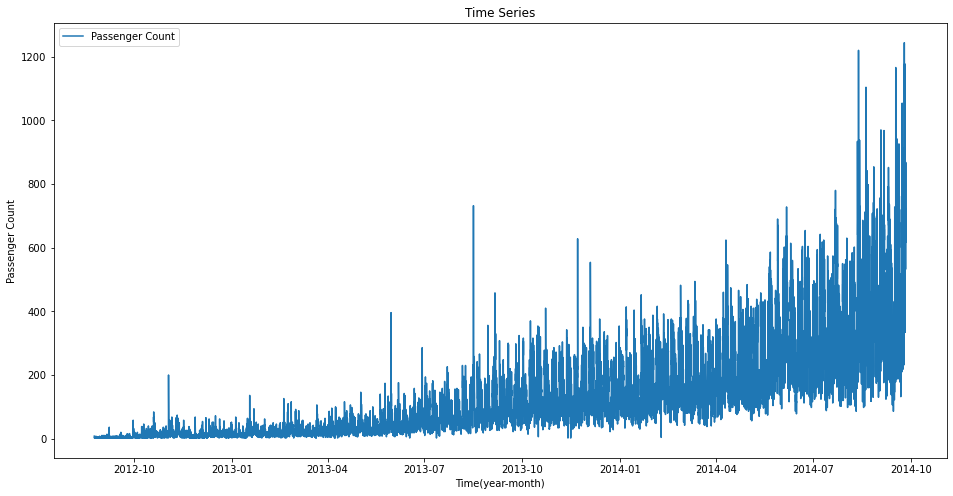

In [15]:
train.index = train.Datetime
df =  train.drop('ID',1)
ts = df['Count']
plt.figure(figsize = (16,8))
plt.plot(ts,label = 'Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')

### exploratory analysis

<AxesSubplot:xlabel='year'>

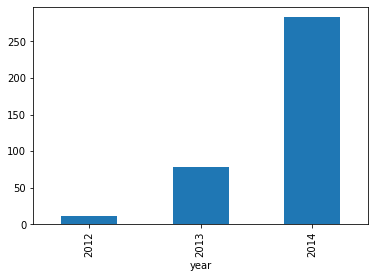

In [16]:
train.groupby('year')['Count'].mean().plot.bar()